In [ ]:
!pip install ucimlrepo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from ucimlrepo import fetch_ucirepo

## Classification :: Bank Marketing, predict if the client will subscribe a term deposit

In [2]:
bank_marketing = fetch_ucirepo(name='Bank Marketing')

In [3]:
print(bank_marketing.metadata.get('additional_info').get('summary'))

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

There are four datasets: 
1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs). 
4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs). 
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM). 

The classification goal is to predict i

In [4]:
print(bank_marketing.metadata.get('additional_info').get('variable_info'))

Input variables:
   # bank client data:
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   5 - default: has credit in default? (binary: "yes","no")
   6 - balance: average yearly balance, in euros (numeric) 
   7 - housing: has housing loan? (binary: "yes","no")
   8 - loan: has personal loan? (binary: "yes","no")
   # related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  10 - day: last contact day of the month (numeric)
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "no

In [5]:
df_bank_marketing = bank_marketing.data.get('original')

In [6]:
df_bank_marketing

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,no


In [7]:
df_bank_marketing['y'].value_counts(normalize=True)

y
no     0.883015
yes    0.116985
Name: proportion, dtype: float64

In [8]:
df_bank_marketing = df_bank_marketing.assign(likelihood_term_deposit=lambda fr: fr['y'].map({'yes': 1, 'no': 0}))

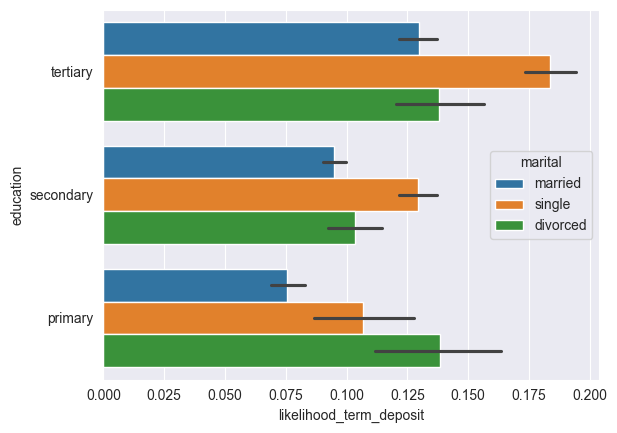

In [9]:
sns.barplot(data=df_bank_marketing, x='likelihood_term_deposit', y='education', hue='marital');

# Explore the data
---

<big>

References:

1. [Visualizing distributions of data](https://seaborn.pydata.org/tutorial/distributions.html) with `distplot`, `jointplot`, `pairplot`
2. [Visualizing categorical data](https://seaborn.pydata.org/tutorial/categorical.html) 
3. [Estimating regression fits](https://seaborn.pydata.org/tutorial/regression.html) with `regplot` or `lmplot`

More specifically, try these

- [$displot()$](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot): visualizing the **univariate or bivariate distribution** of data using histograms, kde plots or CDFs
- [$relplot()$](https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot): show the relationship between **two numerical variables** with scatter or line plots
- [$catplot()$](https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot): show the relationship between **a numerical and one or more categorical variables** using boxplots, barplots and more
- [$lmplot()$](https://seaborn.pydata.org/generated/seaborn.lmplot.html#seaborn.lmplot): fits **regression models** across conditional subsets of a dataset



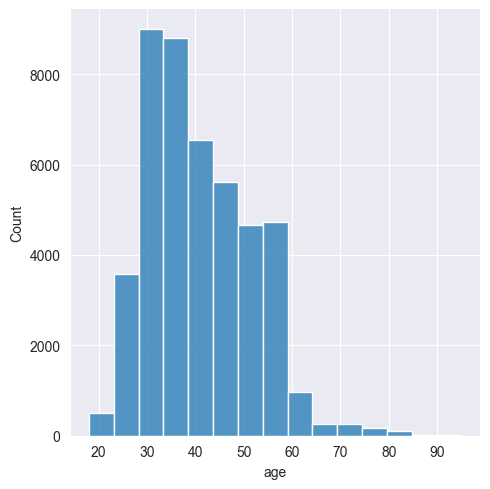

In [10]:
sns.displot(data=df_bank_marketing, x='age', binwidth=5);

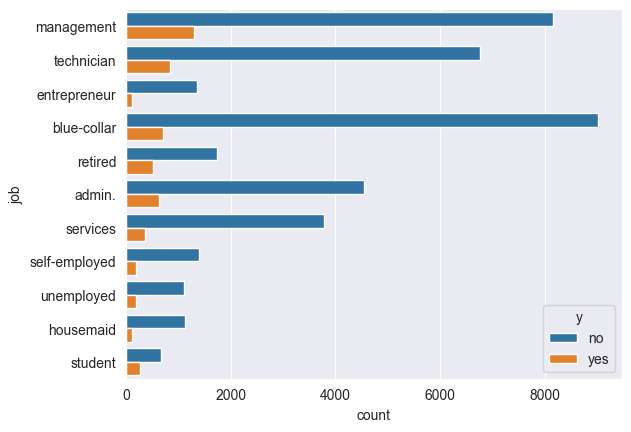

In [11]:
sns.countplot(data=df_bank_marketing, y='job', hue='y');

In [12]:
f"The avg. likelihood of opening a Term Deposit is: {df_bank_marketing['likelihood_term_deposit'].mean():.2%}"

'The avg. likelihood of opening a Term Deposit is: 11.70%'

In [13]:
df_bank_marketing['y'].value_counts(normalize=True)

y
no     0.883015
yes    0.116985
Name: proportion, dtype: float64

In [14]:
df_bank_marketing.groupby('job')['y'].value_counts(normalize=True)

job            y  
admin.         no     0.877973
               yes    0.122027
blue-collar    no     0.927250
               yes    0.072750
entrepreneur   no     0.917283
               yes    0.082717
housemaid      no     0.912097
               yes    0.087903
management     no     0.862444
               yes    0.137556
retired        no     0.772085
               yes    0.227915
self-employed  no     0.881571
               yes    0.118429
services       no     0.911170
               yes    0.088830
student        no     0.713220
               yes    0.286780
technician     no     0.889430
               yes    0.110570
unemployed     no     0.844973
               yes    0.155027
Name: proportion, dtype: float64

In [15]:
pd.concat([
    (df_bank_marketing
     .reset_index()
     .pivot_table(index=col, columns='y', values='index', aggfunc='count')
     .eval("pct_yes=yes/(no+yes)")
     .sort_values('pct_yes')
     .rename(index=lambda i: f"{col}_{i}")
     .tail()) 
    for col 
    in df_bank_marketing.select_dtypes(include=pd.Categorical).fillna('Unknown').drop(columns='y').columns.values
]).sort_values('pct_yes')

y,no,yes,pct_yes
default_yes,763,52,0.063804
loan_yes,6760,484,0.066814
housing_yes,23195,1935,0.077000
education_primary,6260,591,0.086265
marital_married,24459,2755,0.101235
education_secondary,20752,2450,0.105594
default_no,39159,5237,0.117961
marital_divorced,4585,622,0.119455
job_admin.,4540,631,0.122027
poutcome_failure,4283,618,0.126097


In [16]:
df_bank_marketing.groupby(df_bank_marketing['previous'].clip(upper=6))['likelihood_term_deposit'].mean()

previous
0    0.091573
1    0.210317
2    0.216524
3    0.257443
4    0.239496
5    0.263617
6    0.263158
Name: likelihood_term_deposit, dtype: float64

In [17]:
df_bank_marketing.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day_of_week', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y', 'likelihood_term_deposit'],
      dtype='object')

In [18]:
df_x = df_bank_marketing[['age', 'job', 'marital', 'education', 'balance', 'campaign', 'previous']].fillna('MISSING')

In [19]:
df_x_categorical = \
pd.concat([
    pd.get_dummies(df_x.loc[:, col], prefix=col, drop_first=True).astype(int)
    for col 
    in df_x.select_dtypes(include=pd.Categorical).columns
], axis=1)

In [20]:
import numpy as np

In [21]:
df_x_numeric = \
(df_x
    .select_dtypes(include=np.number)
    .apply(lambda col: col.subtract(col.mean()).divide(col.std()))
)

In [22]:
X = pd.concat([df_x_numeric, df_x_categorical], axis=1)

In [23]:
y = df_bank_marketing['likelihood_term_deposit']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, train_size=0.8, random_state=1123)

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
tree = LogisticRegression()

In [73]:
tree.fit(X_tr, y_tr)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [74]:
print(classification_report(y_tr, tree.predict(X_tr)))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     31937
           1       0.31      0.01      0.01      4231

    accuracy                           0.88     36168
   macro avg       0.59      0.50      0.48     36168
weighted avg       0.82      0.88      0.83     36168



In [75]:
print(classification_report(y_te, tree.predict(X_te)))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7985
           1       0.19      0.01      0.01      1058

    accuracy                           0.88      9043
   macro avg       0.54      0.50      0.47      9043
weighted avg       0.80      0.88      0.83      9043



## Classification :: Predict whether annual income of an individual exceeds $50K/yr based on census data

In [8]:
adult = fetch_ucirepo(name='Adult') 

In [9]:
print(adult.metadata.get('additional_info').get('variable_info'))

Listing of attributes:

>50K, <=50K.

age: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: continuous.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num: continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
native-country: Unite

In [10]:
# variable information 
adult.variables

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,N/A,None,no
1,workclass,Feature,Categorical,Income,"Private, Self-emp-not-inc, Self-emp-inc, Feder...",None,yes
2,fnlwgt,Feature,Integer,None,None,None,no
3,education,Feature,Categorical,Education Level,"Bachelors, Some-college, 11th, HS-grad, Prof-...",None,no
4,education-num,Feature,Integer,Education Level,None,None,no
5,marital-status,Feature,Categorical,Other,"Married-civ-spouse, Divorced, Never-married, S...",None,no
6,occupation,Feature,Categorical,Other,"Tech-support, Craft-repair, Other-service, Sal...",None,yes
7,relationship,Feature,Categorical,Other,"Wife, Own-child, Husband, Not-in-family, Other...",None,no
8,race,Feature,Categorical,Race,"White, Asian-Pac-Islander, Amer-Indian-Eskimo,...",None,no
9,sex,Feature,Binary,Sex,"Female, Male.",None,no


In [11]:
df_adult = pd.concat([adult.data['features'], adult.data['targets']], axis=1)

In [12]:
df_adult.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')